# PROBLEM STATEMENT

A Chinese automobile company Geely Auto aspires to enter the Nigerian market by setting up its manufacturing unit and producing cars locally to compete with their Nigerian, US and European counterparts. Specifically, they want to understand the factors affecting the pricing of cars in the Nigerian market, since those may be very different from the Chinese market. 
The company wants to know:
1. Which variables are significant in predicting the price of a car
2. How well do those variables describe the price of a car



# OBJECTIVES

To model the price of cars with the available independent variables. The management will use it to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


# IMPORTING LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading dataset
df1 = pd.read_csv('CarPrice_data.csv')
df1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# DESCRIBING AND UNDERSTANDING DATASET

In [3]:
#let look at the shape
df1.shape

(205, 26)

The dataset comprises of 205 rows and 26 columns of datas for this study

In [4]:
#checking the columns heading
df1.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
#checking for null values in the dataset
df1.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

This dataset has no null or NaN values.

In [6]:
#checking for duplicate in the dataset
df1.duplicated().sum()

0

This dataset has no duplicate values

In [7]:
#Let's check the info of this dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
#Let's describe our dataset
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


The dataset description gives us the mean, standard deviation, minimum, the percentiles and maximum values of the dataset as shown above. 

# UNIVARIATE ANALYSIS

FUEL TYPE

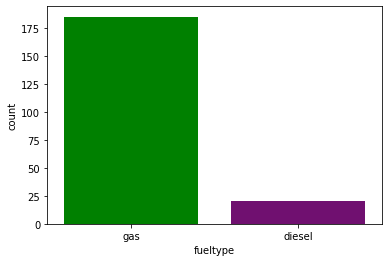

In [9]:
fueltype = sns.countplot(x = 'fueltype', data = df1, color = 'purple')
patch_h = [patch.get_height() for patch in fueltype.patches]
tallest = np.argmax(patch_h)
fueltype.patches[tallest].set_facecolor('green')
plt.show()

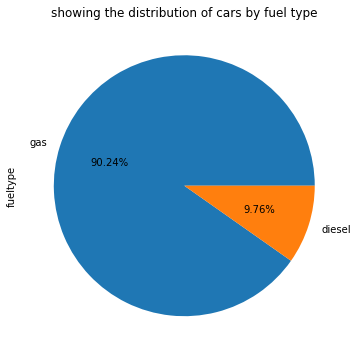

In [10]:
df1['fueltype'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', shadow = False, figsize = (8,6),  )
plt.title('showing the distribution of cars by fuel type')
plt.show()

Most of the cars use gas than diesel for it's operation. Only few cars produced by the company uses diesel fuel type

ASPIRATION

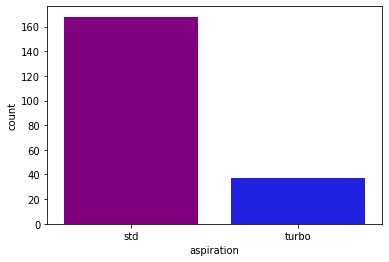

In [11]:
aspiration = sns.countplot(x = 'aspiration', data = df1, color = 'blue')
patch_h = [patch.get_height() for patch in aspiration.patches]
tallest = np.argmax(patch_h)
aspiration.patches[tallest].set_facecolor('purple')
plt.show()

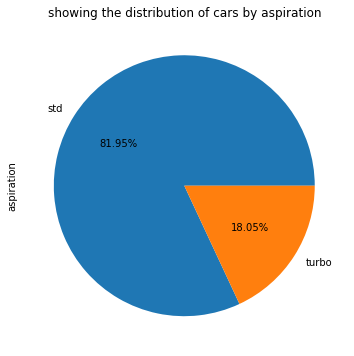

In [12]:
df1['aspiration'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', shadow = False, figsize = (8,6),  )
plt.title('showing the distribution of cars by aspiration')
plt.show()

Majority of the aspiration of the cars produced by the company are std. Only 18.05% of the cars are of turbo aspiration

DOOR NUMBER

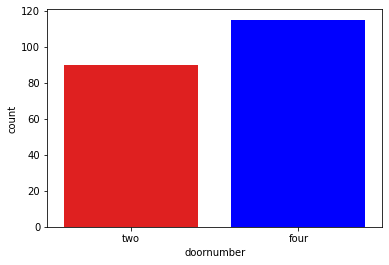

In [13]:
doornumber = sns.countplot(x = 'doornumber', data = df1, color = 'red')
patch_h = [patch.get_height() for patch in doornumber.patches]
tallest = np.argmax(patch_h)
doornumber.patches[tallest].set_facecolor('blue')
plt.show()

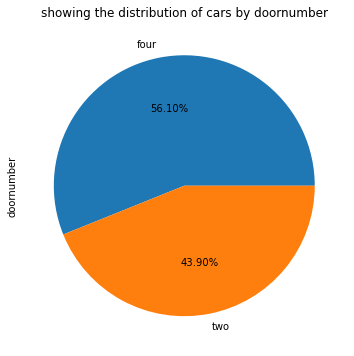

In [14]:
df1['doornumber'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', shadow = False, figsize = (8,6),  )
plt.title('showing the distribution of cars by doornumber')
plt.show()

Cars with four door number are more than the cars with two door numbers

 CAR BODY

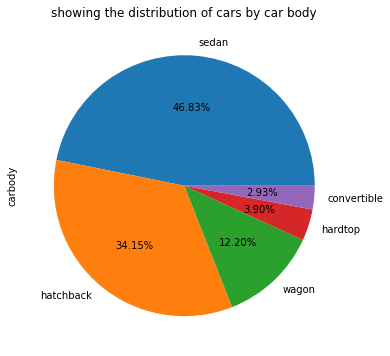

In [15]:
df1['carbody'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', shadow = False, figsize = (8,6),  )
plt.title('showing the distribution of cars by car body')
plt.show()

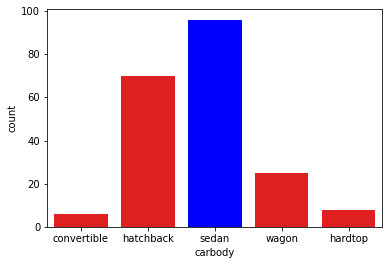

In [16]:
carbody = sns.countplot(x = 'carbody', data = df1, color = 'red')
patch_h = [patch.get_height() for patch in carbody.patches]
tallest = np.argmax(patch_h)
carbody.patches[tallest].set_facecolor('blue')
plt.show()

Majority of the car body are made with sedan. Least number of car bodies are produced with convertible materials

DRIVE WHEEL

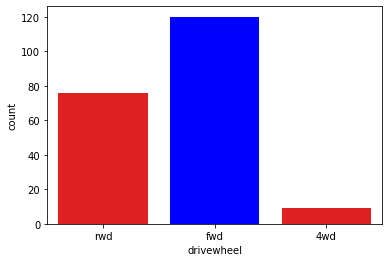

In [17]:
drivewheel = sns.countplot(x = 'drivewheel', data = df1, color = 'red')
patch_h = [patch.get_height() for patch in drivewheel.patches]
tallest = np.argmax(patch_h)
drivewheel.patches[tallest].set_facecolor('blue')
plt.show()

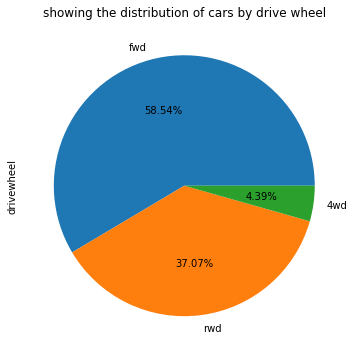

In [18]:
df1['drivewheel'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', shadow = False, figsize = (8,6),  )
plt.title('showing the distribution of cars by drive wheel')
plt.show()

Majority of the car use the fwd drive wheel. least count of the cars use the 4wddrive wheel

ENGINE LOCATION

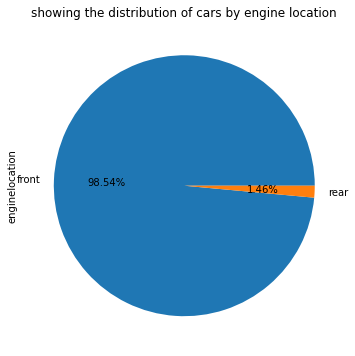

In [19]:
df1['enginelocation'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', shadow = False, figsize = (8,6),  )
plt.title('showing the distribution of cars by engine location')
plt.show()

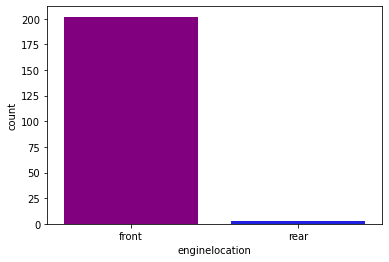

In [20]:
enginelocation = sns.countplot(x = 'enginelocation', data = df1, color = 'blue')
patch_h = [patch.get_height() for patch in enginelocation.patches]
tallest = np.argmax(patch_h)
enginelocation.patches[tallest].set_facecolor('purple')
plt.show()

Vast majority of the car have their engine located in front of the car. Only 1.46% have their engine located at the rare

FUEL SYSTEM

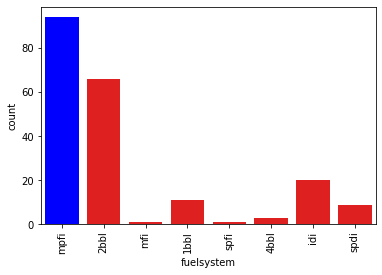

In [21]:
fuelsystem = sns.countplot(x = 'fuelsystem', data = df1, color = 'red')
patch_h = [patch.get_height() for patch in fuelsystem.patches]
tallest = np.argmax(patch_h)
fuelsystem.patches[tallest].set_facecolor('blue')
plt.xticks(rotation = 90)
plt.show()

High count of the car produced use mpfi fuel system followed by the 2bbl fuel system. Least count of the cars use the spfi and mfi fuel system

SYMBOLING

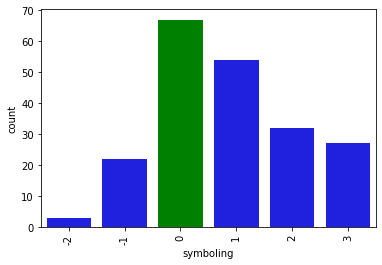

In [22]:
symboling = sns.countplot(x = 'symboling', data = df1, color = 'blue')
patch_h = [patch.get_height() for patch in symboling.patches]
tallest = np.argmax(patch_h)
symboling.patches[tallest].set_facecolor('green')
plt.xticks(rotation = 90)
plt.show()

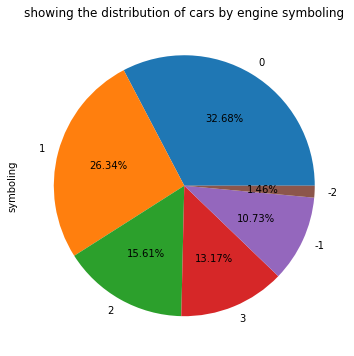

In [23]:
df1['symboling'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', shadow = False, figsize = (8,6),  )
plt.title('showing the distribution of cars by engine symboling')
plt.show()

ENGINE TYPE

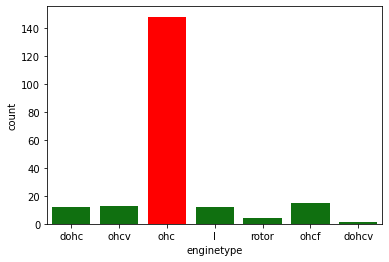

In [24]:
enginetype = sns.countplot(x = 'enginetype', data = df1, color = 'green')
patch_h = [patch.get_height() for patch in enginetype.patches]
tallest = np.argmax(patch_h)
enginetype.patches[tallest].set_facecolor('red')
plt.show()

Majority ofthe cars have the ohc engine type

CYLINDER NUMBER

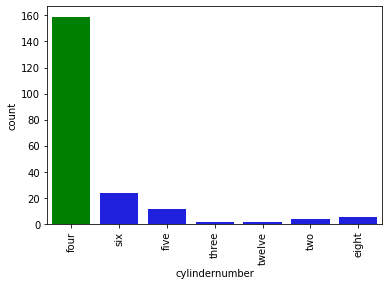

In [25]:
cylindernumber = sns.countplot(x = 'cylindernumber', data = df1, color = 'blue')
patch_h = [patch.get_height() for patch in cylindernumber.patches]
tallest = np.argmax(patch_h)
cylindernumber.patches[tallest].set_facecolor('green')
plt.xticks(rotation = 90)
plt.show()

Cars with four cylinder number has the highest count

# NUMERICAL VARIABLE UNIVARIATE ANALYSIS

PRICE

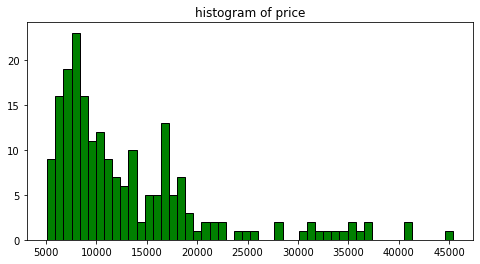

In [26]:
plt.figure(figsize = (8,4))
plt.hist(df1['price'], edgecolor = 'black', bins = 50, color = 'green')
plt.title('histogram of price')
plt.show()

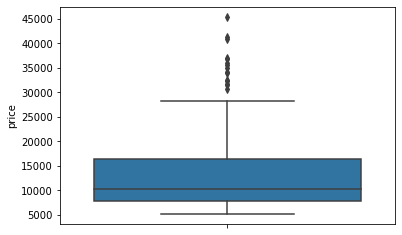

In [27]:
sns.boxplot(y  = 'price', data = df1)
plt.show()

The maximum and minimum car prices are 45400 and 5118 repectively. The mean price of the car is 13276.71

CAR HEIGHT

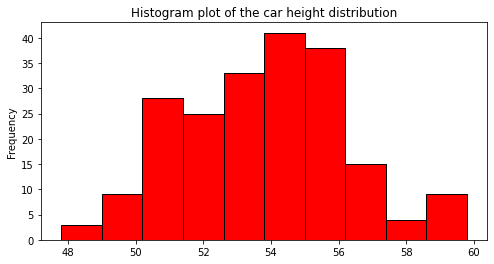

In [28]:
df1['carheight'].plot.hist(edgecolor = 'black', color = 'red', grid = False, figsize = (8, 4) )
plt.title('Histogram plot of the car height distribution')
plt.show()

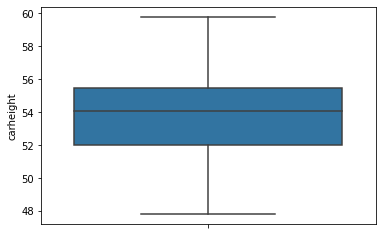

In [29]:
sns.boxplot(y = 'carheight', data = df1)
plt.show()

The minimum and maximum car height are 47.80 and 59.8 respectively

CAR WIDTH

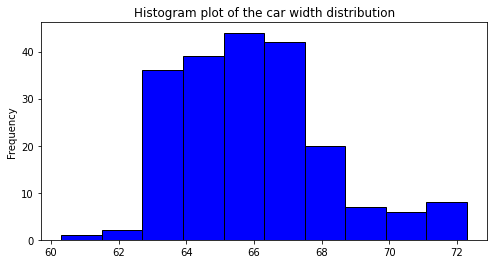

In [30]:
df1['carwidth'].plot.hist(edgecolor = 'black', color = 'blue', grid = False, figsize = (8, 4) )
plt.title('Histogram plot of the car width distribution')
plt.show()

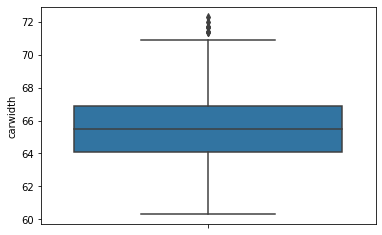

In [31]:
sns.boxplot(y = 'carwidth', data = df1)
plt.show()

The maximum and minimum car width are 72.30 and 60.30 respectively

CAR LENGTH

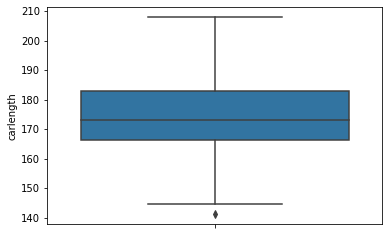

In [32]:
sns.boxplot(y ='carlength', data = df1)
plt.show()

HORSE POWER

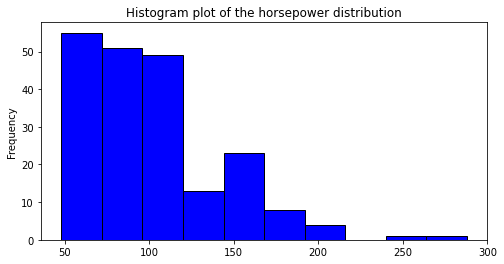

In [33]:
df1['horsepower'].plot.hist(edgecolor = 'black', color = 'blue', grid = False, figsize = (8, 4) )
plt.title('Histogram plot of the horsepower distribution')
plt.show()

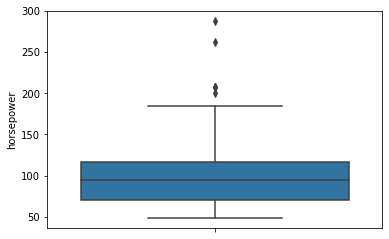

In [34]:
sns.boxplot(y= 'horsepower', data =df1)
plt.show()

The maximum and minmum horse power are 288 and 48.00 respectively for the cars

ENGINE SIZE

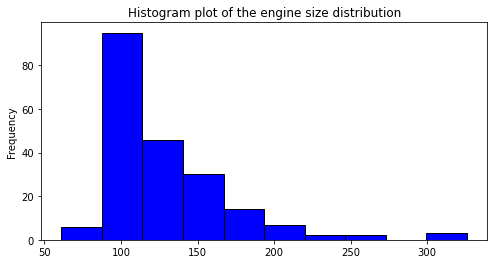

In [35]:
df1['enginesize'].plot.hist(edgecolor = 'black', color = 'blue', grid = False, figsize = (8, 4) )
plt.title('Histogram plot of the engine size distribution')
plt.show()

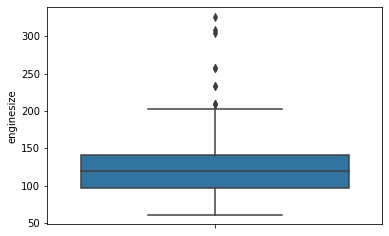

In [36]:
sns.boxplot(y = 'enginesize', data =  df1)
plt.show()

the minimum and maximum car engine size are 326.00 and 61 respectively

CURB WEIGHT

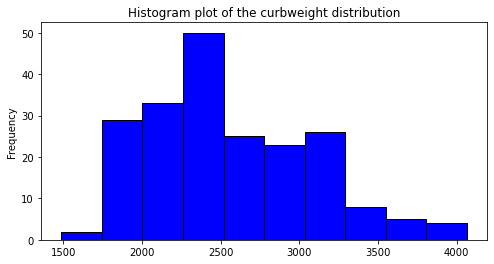

In [37]:
df1['curbweight'].plot.hist(edgecolor = 'black', color = 'blue', grid = False, figsize = (8, 4) )
plt.title('Histogram plot of the curbweight distribution')
plt.show()

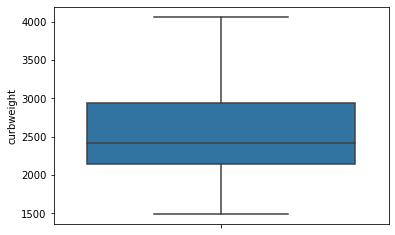

In [38]:
sns.boxplot(y ='curbweight', data = df1)
plt.show()

The maximum and the minimum curb weight of the cars are 4066 and 1488 repectively

WHEEL BASE

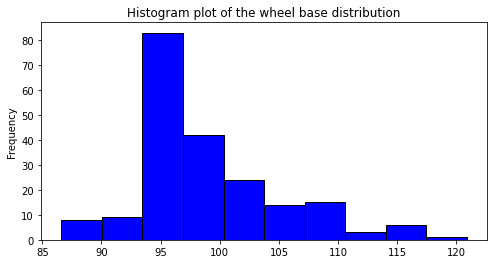

In [39]:
df1['wheelbase'].plot.hist(edgecolor = 'black', color = 'blue', grid = False, figsize = (8, 4) )
plt.title('Histogram plot of the wheel base distribution')
plt.show()

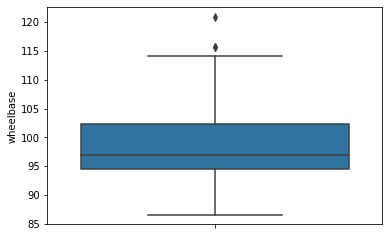

In [40]:
sns.boxplot(y = 'wheelbase', data = df1)
plt.show()

The maximum and minimum wheel base are 120.90 and 86.60 respectively

STROKE

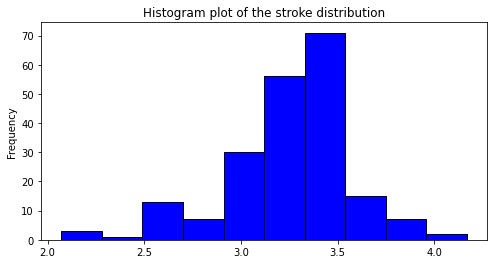

In [41]:
df1['stroke'].plot.hist(edgecolor = 'black', color = 'blue', grid = False, figsize = (8, 4) )
plt.title('Histogram plot of the stroke distribution')
plt.show()

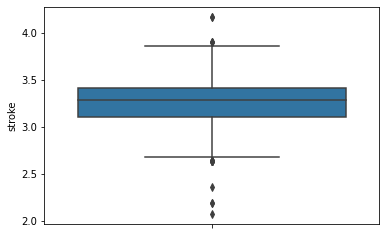

In [42]:
sns.boxplot(y = 'stroke', data = df1)
plt.show()

The minimum and maximum stroke value of the cars are 4.17, 2.07 respectively

PEAK RPM

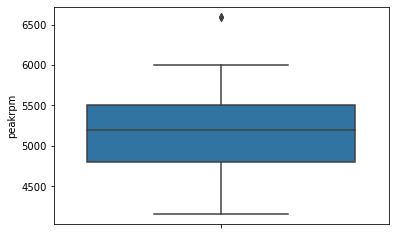

In [43]:
sns.boxplot(y = 'peakrpm', data = df1)
plt.show()

The maximum and minimum peakrpm are 6600 and 4150 respectively

# BIVARIATE ANALYSIS

# What are the top 5 cars that are the most expensive?

In [44]:
car_price = df1.groupby('CarName')['price'].sum().sort_values(ascending = False).head(6)
car_price

CarName
peugeot 504                        92615.0
porsche cayenne                    65428.5
bmw x3                             57985.0
toyota corolla                     57180.0
toyota corona                      56198.0
buick regal sport coupe (turbo)    45400.0
Name: price, dtype: float64

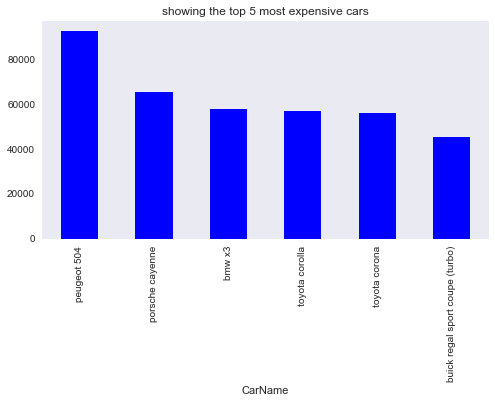

In [45]:
plt.style.use('seaborn')
car_price.plot(kind = 'bar', figsize = (8,4), colormap = 'winter', grid = False)
plt.title("showing the top 5 most expensive cars")
plt.show()

The plot above gives a clear view of the top 5 most expensive cars. The most expensive car is peugeot 504

# Which of the car is the most expensive base on the fuel type it use?

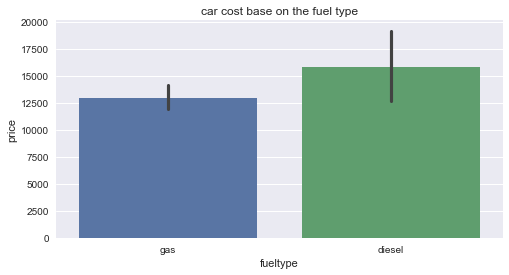

In [46]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'fueltype', y = 'price', data = df1)
plt.title('car cost base on the fuel type')
plt.show()

Cars that use diesel fuel type are more expensive than the gas fuel type

# Which of the car is the most expensive base on the carbody?

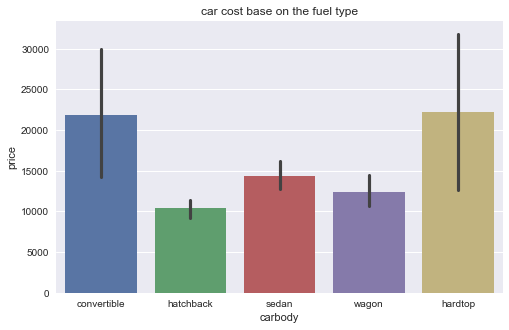

In [47]:
plt.figure(figsize = (8, 5))
sns.barplot(x = 'carbody', y = 'price', data = df1)
plt.title('car cost base on the fuel type')
plt.show()

Cars with hardtop carbody are the most expensive.hatchback carbody type are the least expensive

In [48]:
df1_carbody = df1.groupby('carbody')['price'].sum().sort_values(ascending = False)
df1_carbody

carbody
sedan          1377050.000
hatchback       726365.667
wagon           309299.000
hardtop         177668.000
convertible     131343.000
Name: price, dtype: float64

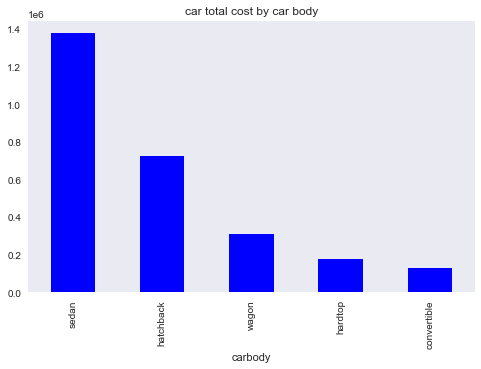

In [49]:
plt.style.use('seaborn')
df1_carbody.plot(kind = 'bar', figsize = (8,5), colormap='winter', grid = False)
plt.title('car total cost by car body', fontsize = 12)
plt.show()

In summation, car with sedan body type have the highest cost. Convertible body type have the least price

# Which of the car is the most expensive base on the carbody and aspiration?

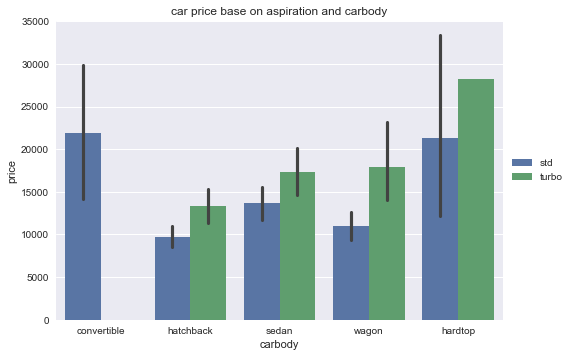

In [50]:
sns.barplot(x = 'carbody', y = 'price', hue = 'aspiration', data = df1)
plt.title('car price base on aspiration and carbody')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

cars with turbo aspiration are generally more expensive than std. cars with hardtop body type and turbo aspiration are the most expensive

# what type of car is the most expensive base on the engine type?

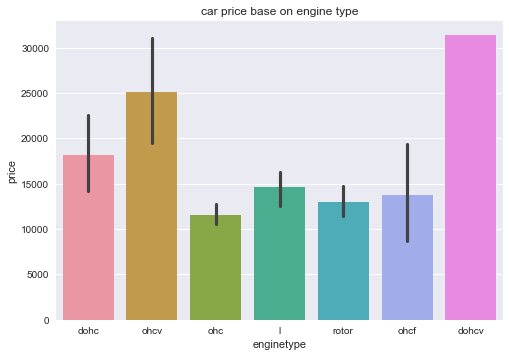

In [51]:
sns.barplot(x = 'enginetype', y = 'price', data = df1)
plt.title('car price base on engine type')
plt.show()

cars with dohcv engine type are the most expensive. cars with ohc engine type are the least expensive

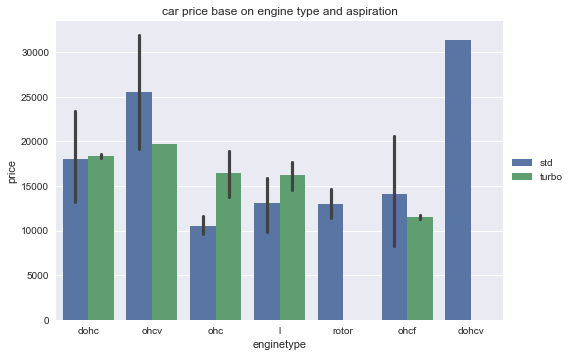

In [52]:
sns.barplot(x = 'enginetype', y = 'price', hue = 'aspiration', data = df1)
plt.title('car price base on engine type and aspiration')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

cars with dohcv aspiration and std aspiration are the most expensive. ohc engine type and std aspiration is the least expensive car

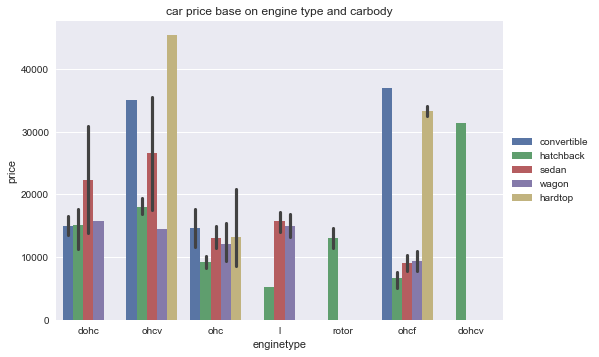

In [53]:
sns.barplot(x = 'enginetype', y = 'price', hue = 'carbody', data = df1)
plt.title('car price base on engine type and carbody')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

ohcv engine type and hard top car body type is the most expensive.

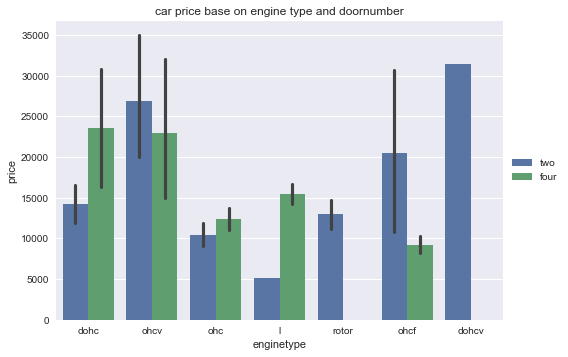

In [54]:
sns.barplot(x = 'enginetype', y = 'price', hue = 'doornumber', data = df1)
plt.title('car price base on engine type and doornumber')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

cars with dohcv engine type with two door are the most expensive. In most cases, cars with four doors are expensive with exception of few cases

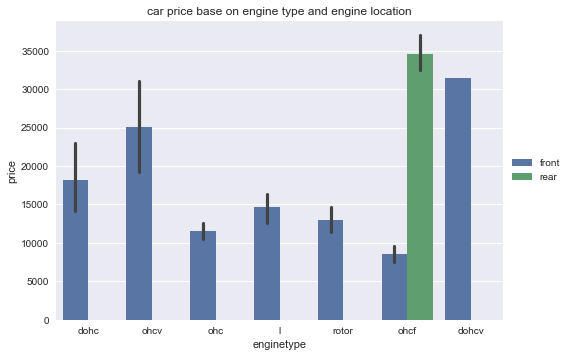

In [55]:
sns.barplot(x = 'enginetype', y = 'price', hue = 'enginelocation', data = df1)
plt.title('car price base on engine type and engine location')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

cars with engine located at the rare is more expensive and it only has the ohcf engine type

# Which of the car is the most expensive base on the cylinder number?

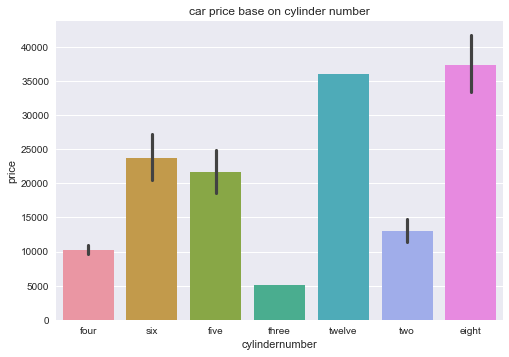

In [56]:
sns.barplot(x = 'cylindernumber', y = 'price', data = df1)
plt.title('car price base on cylinder number')
plt.show()

Cars with eight cylinders are the most expensive. The least expensive cars have three cylinder

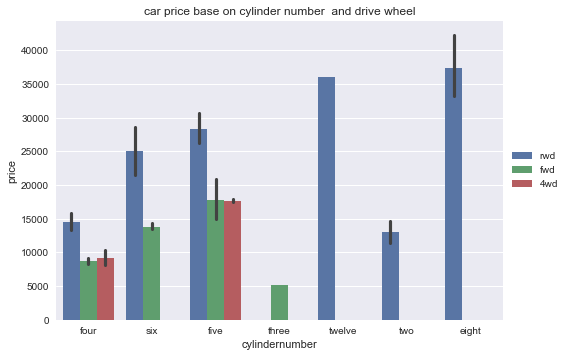

In [57]:
sns.barplot(x = 'cylindernumber', y = 'price', hue = 'drivewheel', data = df1)
plt.title('car price base on cylinder number  and drive wheel')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

Generally cars with rwd drive wheel are the most expensive. cars with eight cylinder and rwd drive wheeel is the most expensive

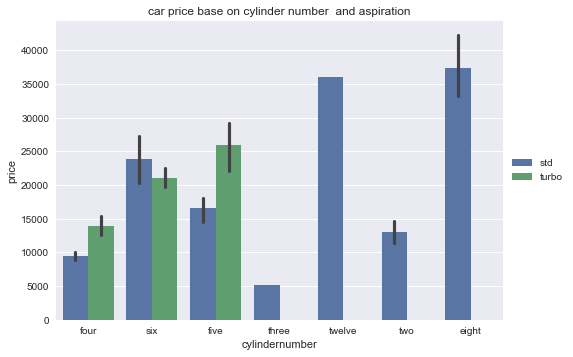

In [58]:
sns.barplot(x = 'cylindernumber', y = 'price', hue = 'aspiration', data = df1)
plt.title('car price base on cylinder number  and aspiration')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

std aspiration and eight cylinder is the most expensive. the least expensive has three cylinder and of std aspiration

# which car is the most expensive base on door numbers

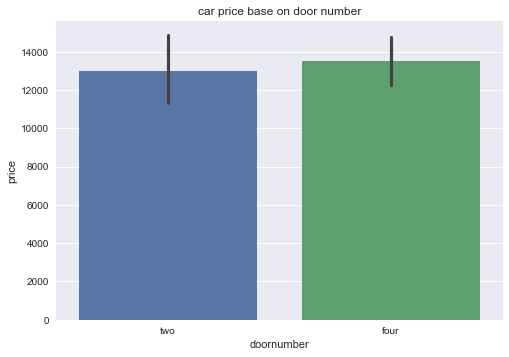

In [59]:
sns.barplot(x ='doornumber', y = 'price',  data = df1)
plt.title('car price base on door number')
plt.show()

there is no much significant difference in price of cars with two and four doors

# NUMERICAL NUMERICAL BIVARIATE ANALYSIS

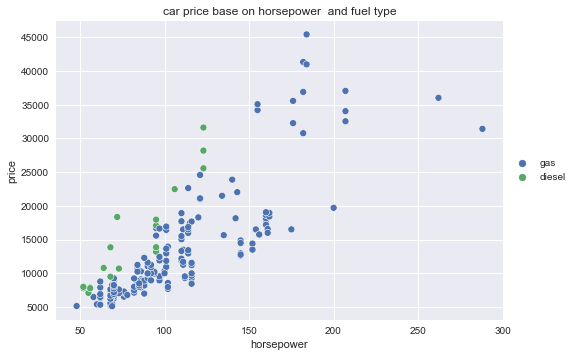

In [60]:
sns.scatterplot(x = 'horsepower', y= 'price', hue = 'fueltype', data = df1)
plt.title('car price base on horsepower  and fuel type')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

A scatter plot showing a relationship between horsepower and price of car with respect to the fuel type

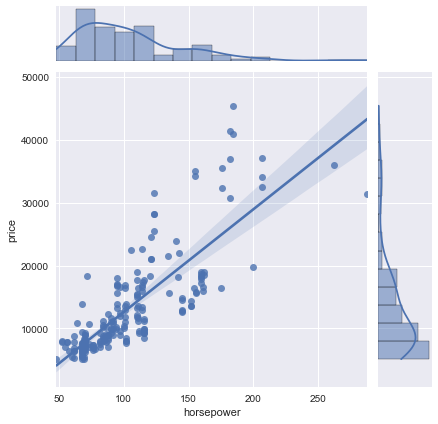

In [61]:
sns.jointplot( x= 'horsepower', y = 'price', data = df1,kind = 'reg')
plt.show()

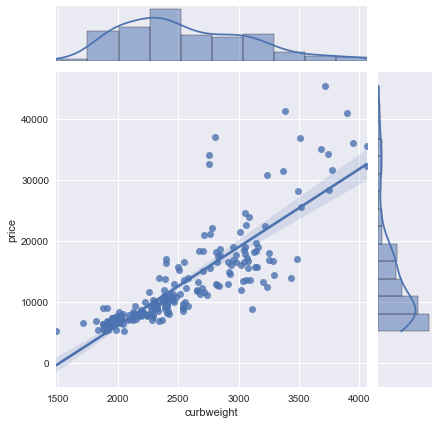

In [62]:
sns.jointplot( x= 'curbweight', y = 'price', data = df1,kind = 'reg')
plt.show()

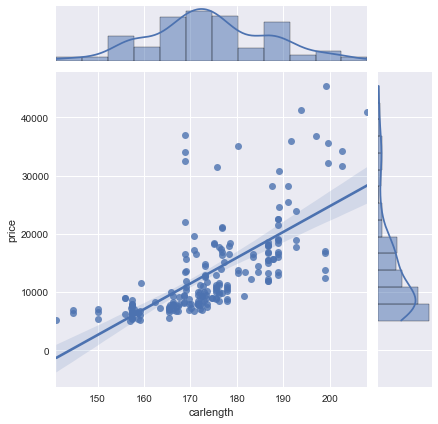

In [63]:
sns.jointplot( x= 'carlength', y = 'price', data = df1,kind = 'reg')
plt.show()

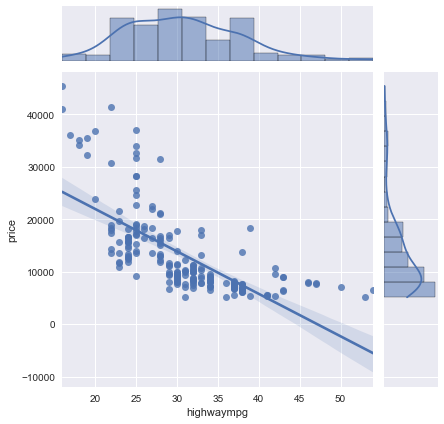

In [64]:
sns.jointplot( x = 'highwaympg', y = 'price', data = df1,kind = 'reg')
plt.show()

highway mpg incresases as the price decrease

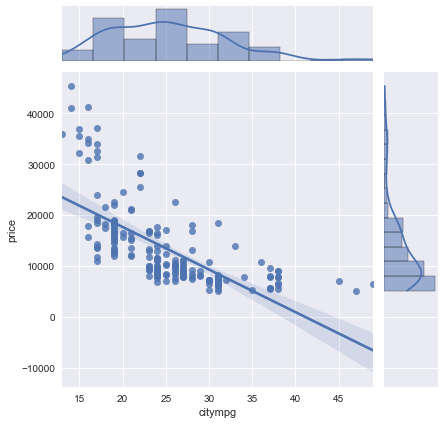

In [65]:
sns.jointplot( x= 'citympg', y = 'price', data = df1,kind = 'reg')
plt.show()

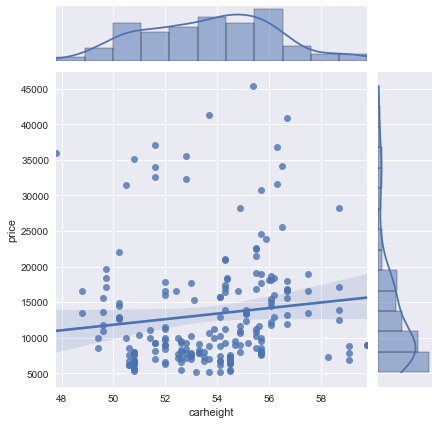

In [66]:
sns.jointplot( x= 'carheight', y = 'price', data = df1,kind = 'reg')
plt.show()

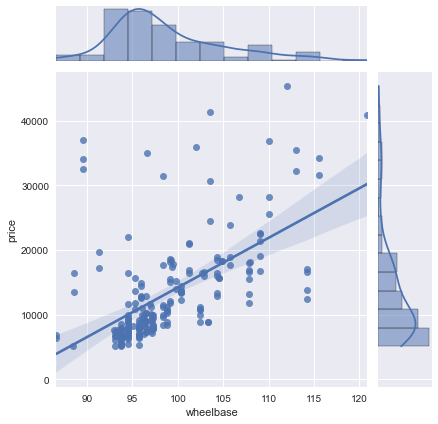

In [67]:
sns.jointplot( x= 'wheelbase', y = 'price', data = df1,kind = 'reg')
plt.show()

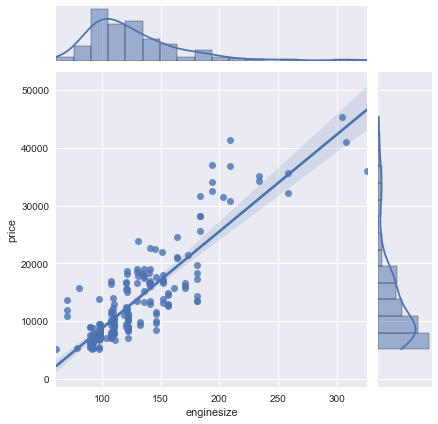

In [68]:
sns.jointplot( x= 'enginesize', y = 'price', data = df1,kind = 'reg')
plt.show()

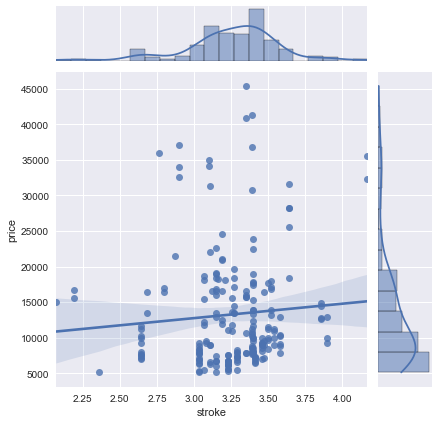

In [69]:
sns.jointplot( x= 'stroke', y = 'price', data = df1,kind = 'reg')
plt.show()

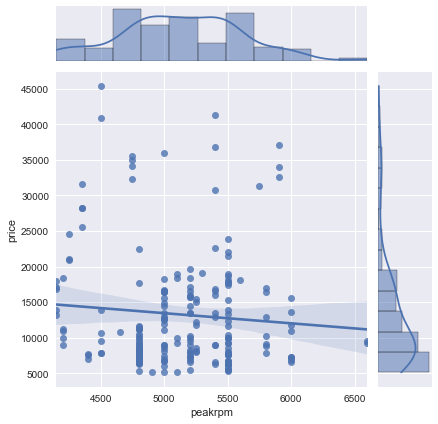

In [70]:
sns.jointplot( x= 'peakrpm', y = 'price', data = df1,kind = 'reg')
plt.show()

# MULTIVARIATE ANALYSIS

Looking at the pairplot relationship

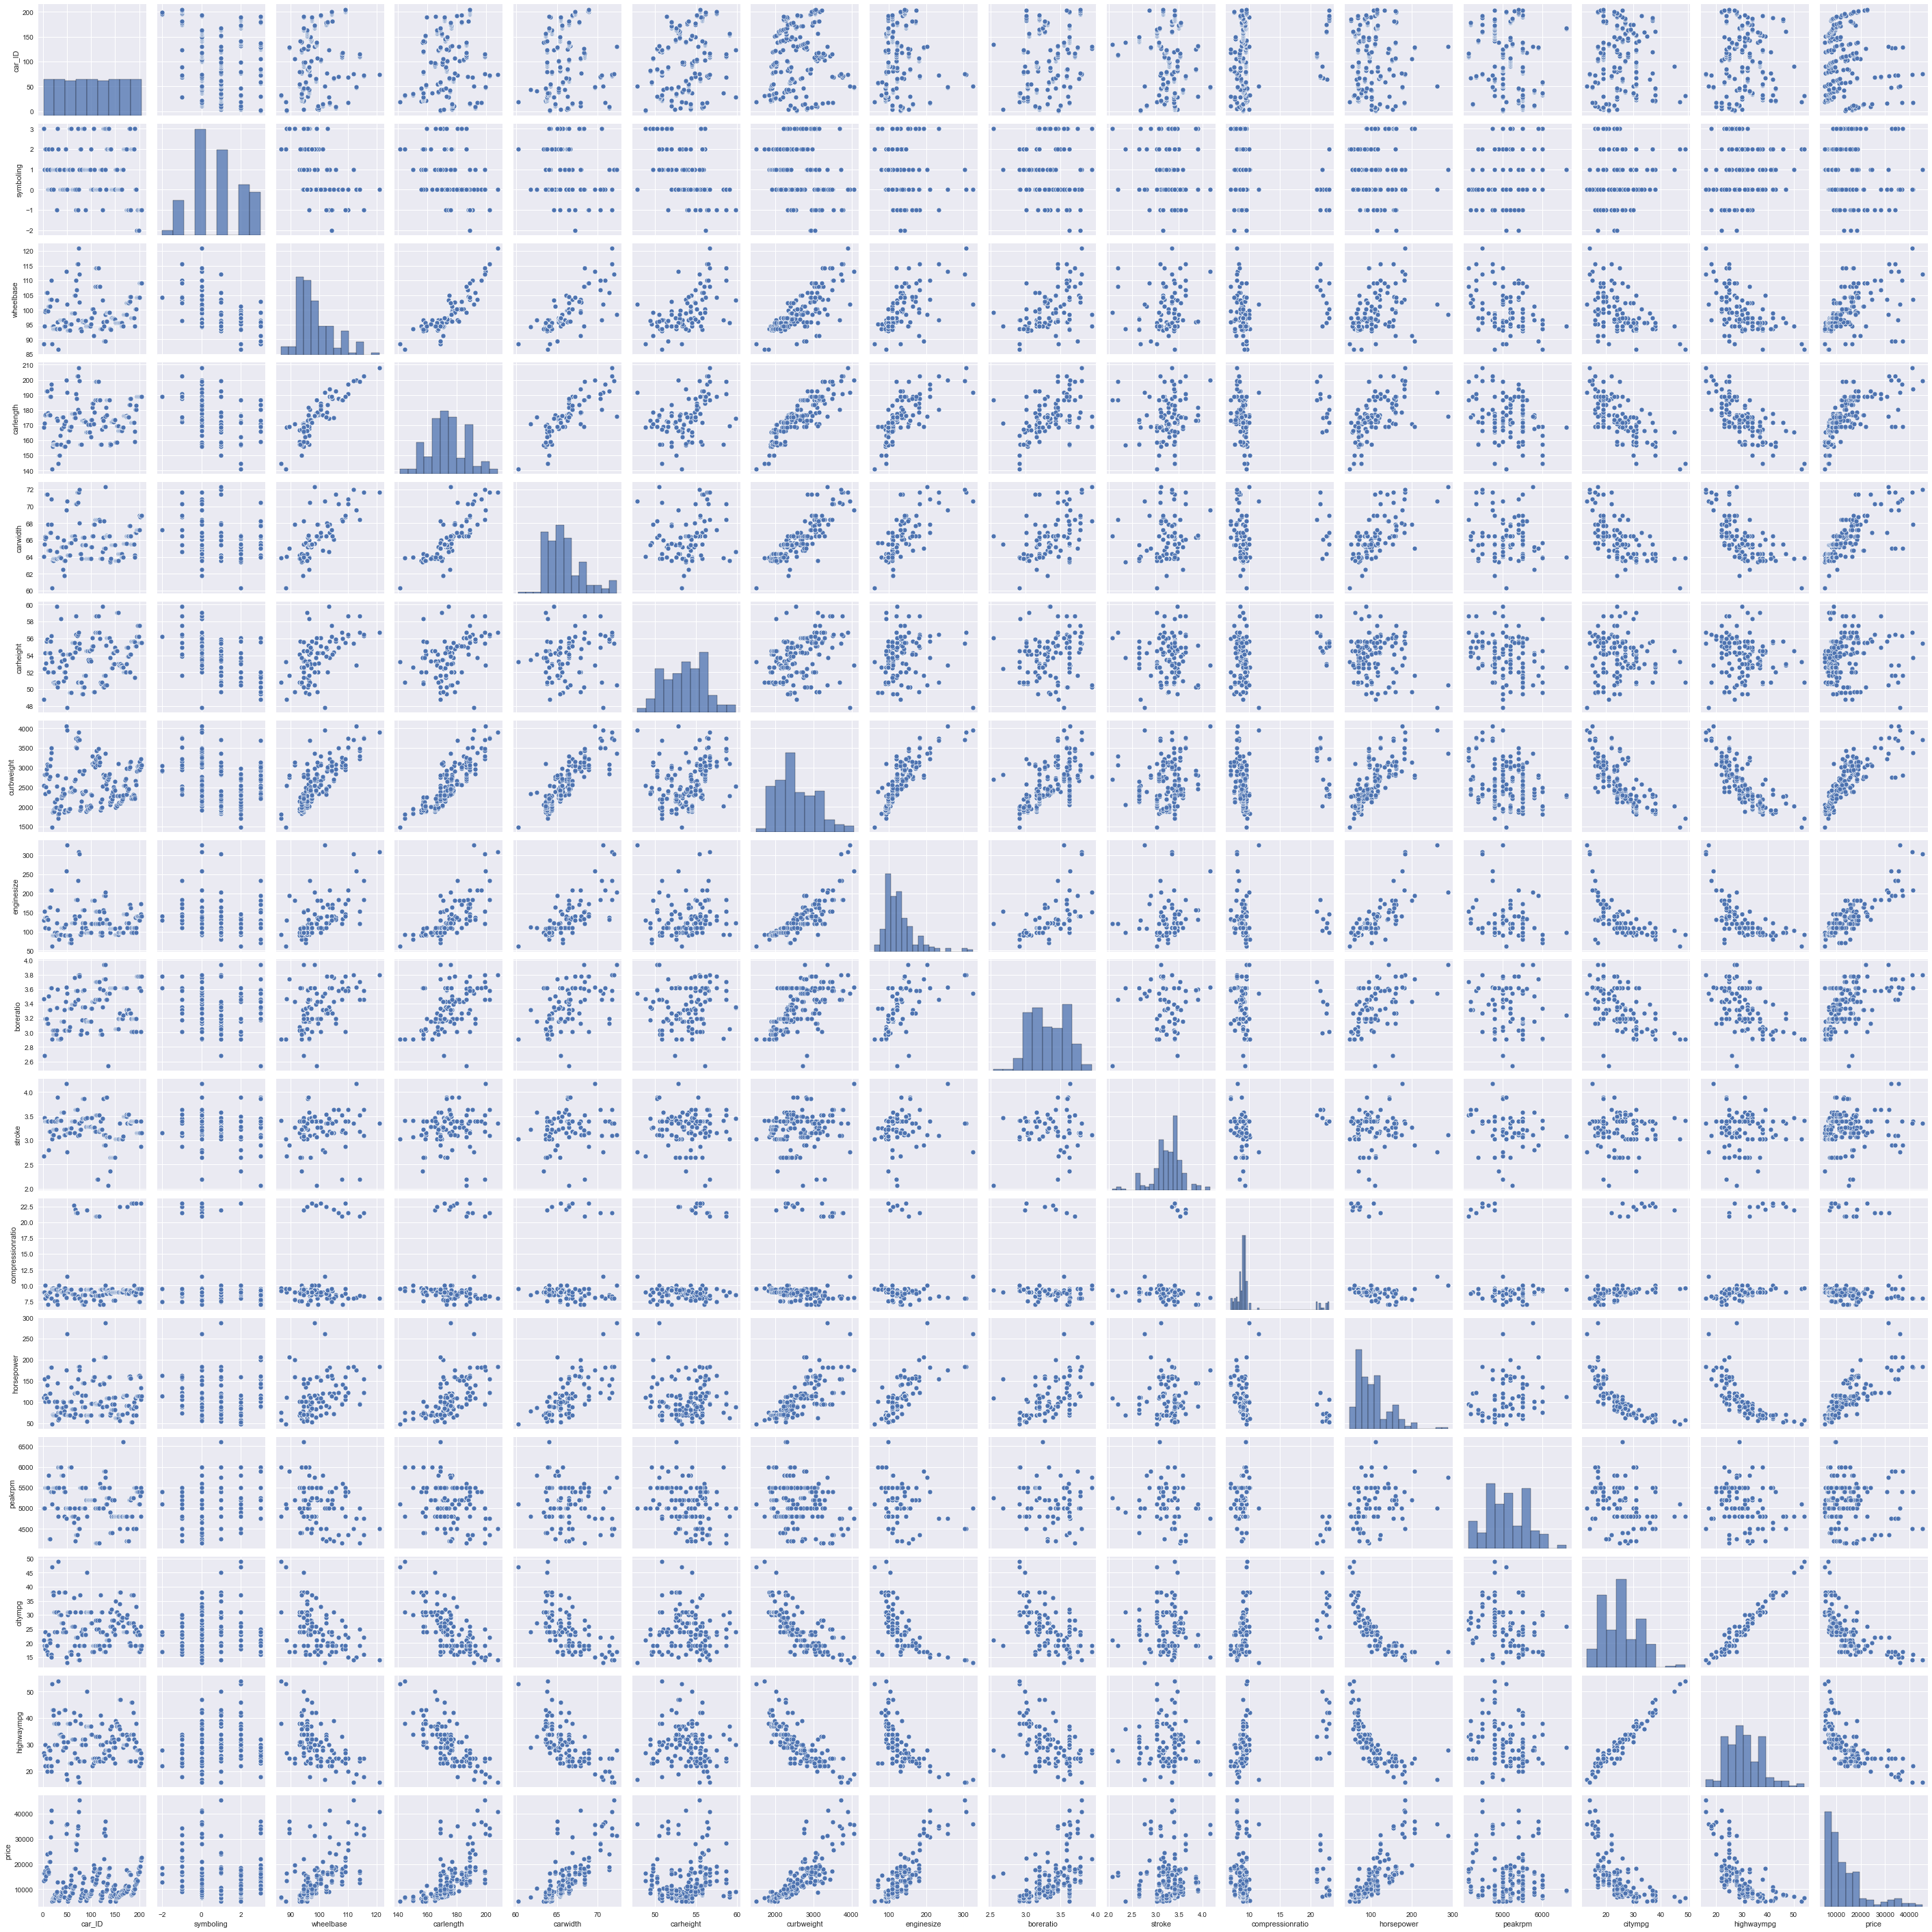

In [71]:
sns.pairplot(df1)

Lets look at the correlation

In [72]:
df1.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


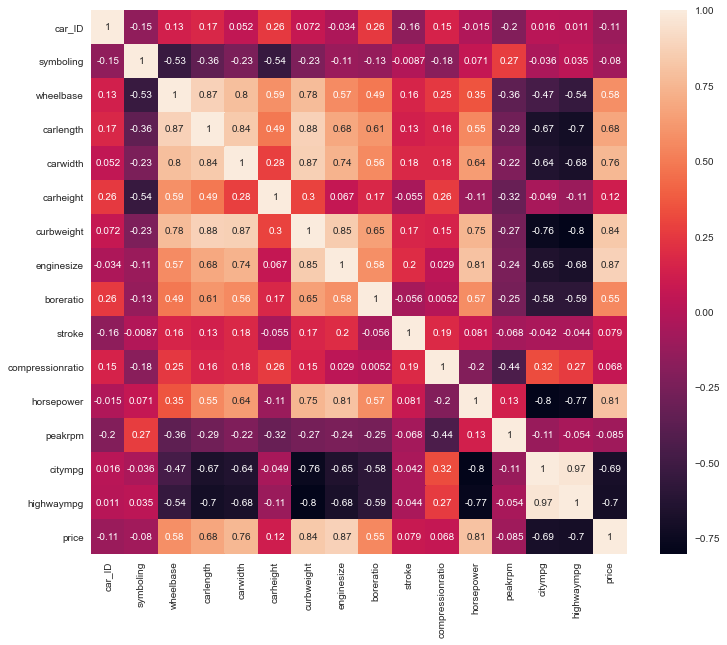

In [73]:
plt.figure(figsize =  (12,10))
sns.heatmap(df1.corr(), annot = True)
plt.show()

# DATA PREPROCESSING

# OUTLIERS DETECTION AND TREATMENT

In [74]:
# lets create a function to visualize our outliers
def plot_boxplot (df, ft): #ft will be for features in column
    df.boxplot(column =[ft])
    plt.grid(False)
    plt.show


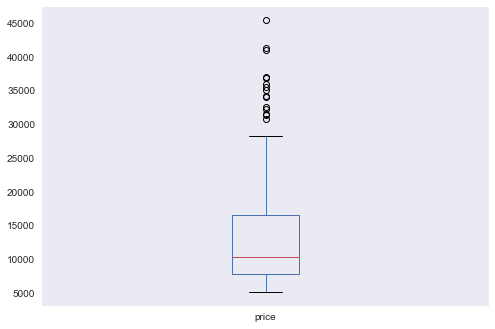

In [75]:
# lets visualize few columns with outliers
plot_boxplot(df1, 'price')

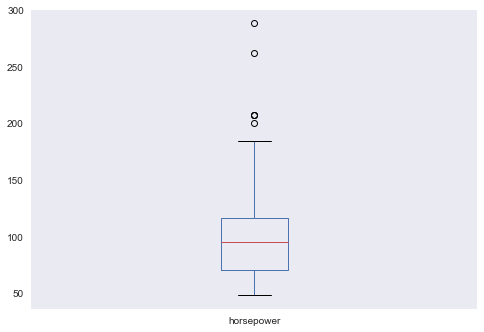

In [76]:
plot_boxplot(df1, 'horsepower') #we can also see outliers here

REMOVE OUTLIERS

In [77]:
# we also create a function to remove the outliers
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1 #Next we get our boundaries
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR #Next we create a list to get list of outliers
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    return ls

In [78]:
# create an empty list to store the output indices from multiple columns
index_list = []
for feature in [ 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']: # Car ID was dropped out cause it is just an index label to identity numbers of car in the study
    index_list.extend(outliers(df1, feature))

In [79]:
index_list

[70,
 71,
 73,
 18,
 6,
 7,
 8,
 70,
 71,
 73,
 74,
 129,
 15,
 16,
 17,
 47,
 48,
 49,
 71,
 72,
 73,
 74,
 29,
 47,
 48,
 111,
 113,
 130,
 131,
 134,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 9,
 29,
 49,
 63,
 66,
 67,
 68,
 69,
 70,
 82,
 83,
 84,
 90,
 108,
 110,
 112,
 114,
 116,
 117,
 124,
 158,
 159,
 174,
 182,
 184,
 187,
 192,
 203,
 49,
 105,
 126,
 127,
 128,
 129,
 165,
 166,
 18,
 30,
 18,
 30,
 90,
 15,
 16,
 17,
 47,
 48,
 49,
 70,
 71,
 72,
 73,
 74,
 126,
 127,
 128,
 129]

The index list are where the outliers are located in the data set

In [80]:
# we define a function to remove the outliers from our data set
def remove (df, ls):
    ls =sorted(set(ls))
    df = df.drop(ls)
    return df
    

In [81]:
df1_cleaned = remove(df1, index_list)

In [82]:
df1_cleaned

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [83]:
df1_cleaned.shape

(139, 26)

This will be our new data set we will use to buld our model

In [84]:
# Lets save the new data set as a csv file
df1_cleaned.to_csv('new_carprice.csv', index = False)

# CHECKING MULTICOLLINEARITY

In [85]:
df1_cleaned.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [86]:
# selecting all numeric variables
num = ['int64', 'float64']
num_var = list(df1_cleaned.select_dtypes(include = num))
num_var

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [87]:
df2 = df1_cleaned[['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']]
df2.head(4) #we can now see all the numerical variable of our data set

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0


In [88]:
p = df2.iloc[ :, 0:-1]
p.head(4)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30


In [89]:
r = df2['price']


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train, x_test, y_train, y_test = train_test_split(p, r, test_size = 0.30, random_state = 100)

In [92]:
corrmatrix = x_train.corr()
corrmatrix

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,1.000000,-0.264449,0.386993,0.376689,0.367793,0.367168,0.309906,0.226431,0.382015,0.105242,-0.050673,0.193765,-0.228200,-0.122703,-0.144522
symboling,-0.264449,1.000000,-0.563136,-0.320702,-0.233714,-0.582661,-0.245120,-0.259775,-0.100137,-0.078496,0.119357,-0.087583,0.308020,-0.032614,0.010627
wheelbase,0.386993,-0.563136,1.000000,0.823499,0.773385,0.659500,0.697857,0.547035,0.609695,0.067254,-0.194902,0.491600,-0.266445,-0.512263,-0.549880
carlength,0.376689,-0.320702,0.823499,1.000000,0.824034,0.561077,0.856832,0.701257,0.776879,0.000233,-0.171584,0.672911,-0.298169,-0.717166,-0.718717
carwidth,0.367793,-0.233714,0.773385,0.824034,1.000000,0.371228,0.772866,0.641814,0.688886,0.077583,-0.201485,0.675882,-0.191108,-0.680613,-0.700539
carheight,0.367168,-0.582661,0.659500,0.561077,0.371228,1.000000,0.434088,0.295594,0.347288,-0.005156,-0.075330,0.134281,-0.319162,-0.198502,-0.233638
curbweight,0.309906,-0.245120,0.697857,0.856832,0.772866,0.434088,1.000000,0.807666,0.692371,-0.033745,-0.219006,0.824415,-0.243143,-0.820496,-0.846483
enginesize,0.226431,-0.259775,0.547035,0.701257,0.641814,0.295594,0.807666,1.000000,0.586040,0.092415,-0.163019,0.804269,-0.408035,-0.629927,-0.642058
boreratio,0.382015,-0.100137,0.609695,0.776879,0.688886,0.347288,0.692371,0.586040,1.000000,-0.126312,-0.104904,0.578555,-0.258236,-0.608592,-0.608027
stroke,0.105242,-0.078496,0.067254,0.000233,0.077583,-0.005156,-0.033745,0.092415,-0.126312,1.000000,-0.250635,0.040255,-0.031690,-0.027093,-0.025283


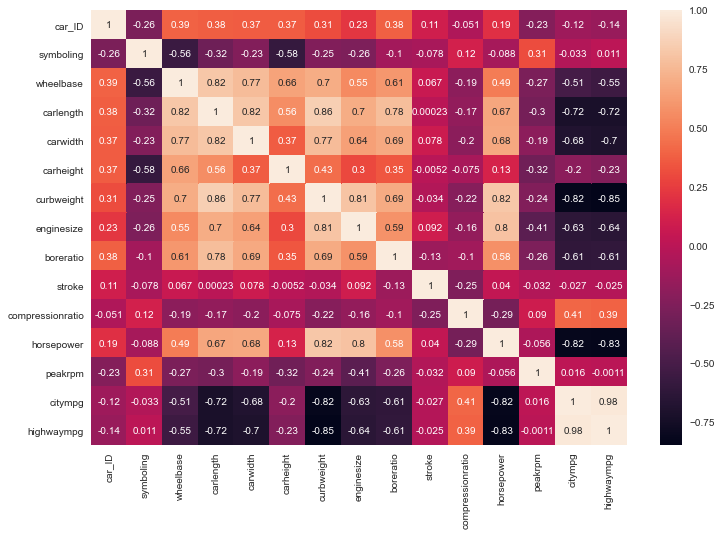

In [93]:
plt.figure(figsize = (12,8))
sns.heatmap(corrmatrix, annot = True)
plt.show()

In [94]:
def correlation (df2, threshold):
    correlated_cols = set()
    corr_matrix = df2.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols #passing the function to get highly correlated variable that might cause linkage

In [95]:
correlation(x_train, 0.80)

{'carlength',
 'carwidth',
 'citympg',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower'}

These features above are strongly correlated and collinear at the set threshold

# BUILDING MODEL




In [96]:
df3 = pd.read_csv('new_carprice.csv')
df3 #This is the cleaned data set we will use to build our model

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
135,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
136,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
137,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [97]:
pd.set_option('display.max_column', 30) #this is just to open up and see all the column of our data set

In [98]:
df3.head(4)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0


In [99]:
df3.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [100]:
x = df3.drop(columns =['car_ID',
'CarName',
'carlength',
 'carwidth',
 'citympg',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower',
 'price'])
x.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm
0,3,gas,std,two,convertible,rwd,front,88.6,48.8,dohc,four,mpfi,3.47,2.68,9.0,5000
1,3,gas,std,two,convertible,rwd,front,88.6,48.8,dohc,four,mpfi,3.47,2.68,9.0,5000
2,1,gas,std,two,hatchback,rwd,front,94.5,52.4,ohcv,six,mpfi,2.68,3.47,9.0,5000
3,2,gas,std,four,sedan,fwd,front,99.8,54.3,ohc,four,mpfi,3.19,3.40,10.0,5500
4,2,gas,std,four,sedan,4wd,front,99.4,54.3,ohc,five,mpfi,3.19,3.40,8.0,5500


In [101]:
x.shape

(139, 16)

In [102]:
y = df3['price']

In [103]:
# Lets encode the data set
x = pd.get_dummies(x)
x.head()

,symboling,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,...,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,48.8,3.47,2.68,9.0,5000,1,1,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,3,88.6,48.8,3.47,2.68,9.0,5000,1,1,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,94.5,52.4,2.68,3.47,9.0,5000,1,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,2,99.8,54.3,3.19,3.40,10.0,5500,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,2,99.4,54.3,3.19,3.40,8.0,5500,1,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [104]:
from sklearn.preprocessing import MinMaxScaler

In [105]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [106]:
x_train

array([[0.51485149, 1.        , 0.10546875, ..., 0.55555556, 0.0952381 ,
        0.14285714],
       [0.97524752, 0.        , 0.61328125, ..., 0.66666667, 0.33333333,
        0.28571429],
       [0.15841584, 0.5       , 0.19921875, ..., 0.72222222, 1.        ,
        0.95238095],
       ...,
       [0.46534653, 0.5       , 0.23046875, ..., 0.55555556, 0.66666667,
        0.71428571],
       [0.16831683, 0.5       , 0.19921875, ..., 1.        , 0.61904762,
        0.57142857],
       [0.05940594, 0.25      , 0.4921875 , ..., 0.02777778, 0.19047619,
        0.28571429]])

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, train_size = 0.70, random_state = 0)

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
model = LinearRegression()

In [111]:
model.fit(x_train, y_train)

LinearRegression()

In [112]:
model.intercept_

-27378.8211685117

In [113]:
model.coef_

array([ 3.55725037e+02,  1.65996556e+02, -1.77585699e+02,  1.00865943e+04,
       -2.36017479e+03,  4.45066699e+02,  1.04689240e+00,  4.72937245e-11,
       -1.60819375e+03,  1.60819375e+03,  4.27220695e+02, -4.27220695e+02,
        2.72500871e+03, -1.96426497e+03, -2.95836011e+02, -1.09873154e+02,
       -3.55034575e+02,  1.98159487e+03, -8.95041193e+02, -1.08655367e+03,
        4.54747351e-13,  5.33379129e+02,  1.48754699e+03,  1.53422749e+03,
       -2.65257284e+03, -9.02580763e+02,  3.44067364e+02, -3.70172051e+03,
        4.26023391e+03, -9.02580763e+02,  1.32424414e+03, -2.27184517e+02,
       -9.02580763e+02,  1.29297928e+03, -1.67763251e+03,  1.90174378e+02])

In [114]:
prediction = model.predict(x_test)

In [115]:
prediction

array([17945.28870708, 14856.04126863, 18083.77043048, 13556.97912262,
        8505.91061881,  8419.58646569,  9859.8001879 ,  7061.29261647,
        9754.28175808,  9331.15467138,  6792.92979955, 14175.81272634,
        6799.99419595, 11888.55016594, 14856.04126863,  9859.8001879 ,
       17841.88649705, 16384.07962804, 18328.93185211,  7565.67890681,
        8573.15468218,  7479.56745408,  6923.25241882, 18863.26990333,
        5960.69465083,  7239.73544532, 19288.62723427,  6519.53909629,
        8706.1108584 , 10945.        , 15208.36663022,  7053.77258815,
       13140.56003885,  7240.00360465,  7751.64176399, 11888.55016594,
        7972.28150511,  9404.24630654, 10945.        , 16545.70154512,
        7212.55581973,  9265.26155985])

# EVALUATION

In [116]:
from numpy import math
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [117]:
mean_squared_error(y_test, prediction)

6162761.621492648

In [118]:
math.sqrt(mean_squared_error(y_test, prediction))

2482.491011361904

In [119]:
score = r2_score(y_test, prediction)
score

0.6962417309276261

Linear regression model perform good with an r2 score of 69.62% on this model

In [120]:
import warnings
warnings.filterwarnings('ignore')


<AxesSubplot:xlabel='price'>

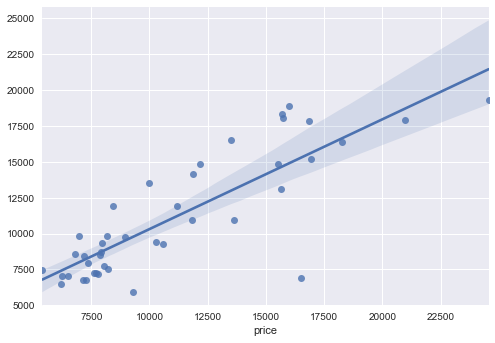

In [121]:
sns.regplot(y_test, prediction)

<AxesSubplot:xlabel='price', ylabel='Count'>

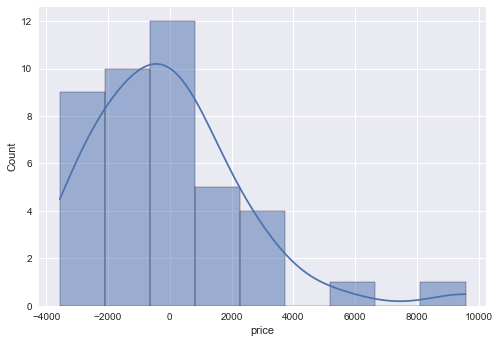

In [122]:
sns.histplot((y_test - prediction), kde = True)

# RANDOM FOREST REGRESSOR

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, train_size = 0.70, random_state = 0)

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
model = RandomForestRegressor(n_estimators = 30, random_state = 0)

In [126]:
rf = model.fit(x_train, y_train)

In [127]:
y_pred = rf.predict(x_test)
y_pred

array([19203.15      , 15187.51666667, 15881.46111111, 12547.53333333,
        8821.54166667,  8150.03333333,  9208.28333333,  6601.3       ,
       10904.03333333,  9226.43333333,  8157.87222222, 15456.26666667,
        6781.775     , 10918.23333333, 15187.51666667,  9208.28333333,
       19057.58333333, 15892.29444444, 15977.31666667,  9801.28412698,
       10779.46666667,  6126.7952381 , 12782.04166667, 16484.53333333,
        9254.78333333,  6737.38888889, 18903.31666667,  6073.88333333,
        8929.46666667, 12068.03333333, 17003.15      ,  6461.26111111,
       15777.66666667,  7531.03333333, 10208.75079365, 10918.23333333,
        7694.46111111,  8942.24444444, 12068.03333333, 13774.5       ,
        6696.23333333,  9383.71428571])

# EVALUATION

In [128]:
mean_squared_error(y_test, y_pred)

3371636.2449761657

In [129]:
math.sqrt(mean_squared_error(y_test, y_pred))

1836.2015807029918

In [130]:
r2_score(y_test, y_pred)

0.8338143753372077

The Random Forest Regressor perform excellently well for this model with a score of 83.38%

<AxesSubplot:xlabel='price'>

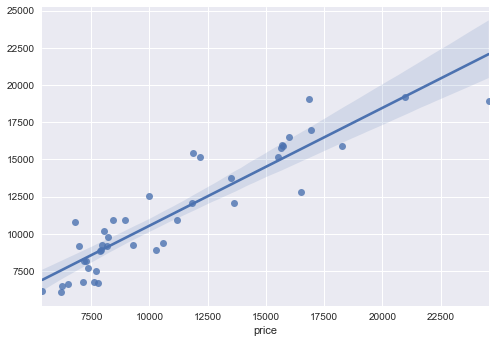

In [131]:
sns.regplot(y_test, y_pred)

<AxesSubplot:xlabel='price', ylabel='Count'>

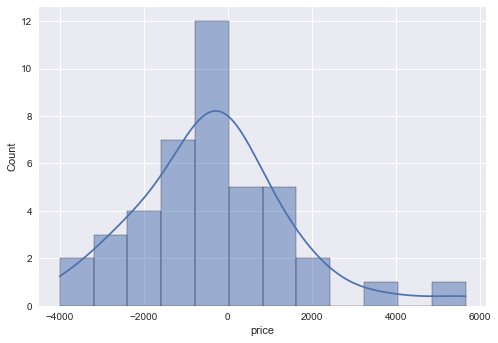

In [132]:
sns.histplot((y_test - y_pred), kde = True)

# ELASTIC NET

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state = 100)

In [134]:
from sklearn.linear_model import ElasticNet

In [135]:
enet = ElasticNet(alpha = 1.0, l1_ratio = 0.5)

In [136]:
enet.fit(x_train, y_train)

ElasticNet()

In [137]:
y_preds = enet.predict(x_test)
y_preds #the predicted price on the test dataset

array([16979.5225674 ,  8382.4607247 ,  8305.44520659, 12894.20180682,
       12072.26337075,  8532.94797657,  7800.66263265,  9002.39247625,
       11286.43038953,  7877.7877951 ,  9020.08974754,  8549.8749596 ,
        7703.46519266,  8533.73877519, 11220.05421709, 14654.74872529,
       14613.6624939 , 12907.87808812,  7637.39077489,  9712.423785  ,
       15553.70814219,  9246.91220988, 14134.04981597, 16698.45733626,
        7097.08508443,  5087.63488105, 11670.87212792, 17023.49400813,
       17023.49400813,  9114.7850729 ,  7716.15203327, 14711.34655475,
       12769.38483882,  9776.2768    ,  8556.20841223])

In [138]:
enet.coef_

array([ 4.43108250e+02,  4.37319205e+02, -3.16672631e+01,  2.40407147e+02,
       -2.45151331e+02, -8.11782020e+01, -2.48853954e-01,  0.00000000e+00,
       -1.40532640e+02,  1.40532591e+02,  3.85077510e+01, -3.85077671e+01,
        2.79687623e+02, -1.87290456e+02, -2.60304954e+02,  2.69059636e+02,
       -1.00150606e+02,  5.17383352e+01, -7.12582063e+02,  6.59843186e+02,
        0.00000000e+00,  2.60384922e+02, -2.21999349e+02, -2.88917269e+02,
        2.40671784e+02,  8.85997980e+00,  1.16332049e+02, -7.21524311e+02,
        5.94332409e+02,  8.85988864e+00, -6.84945785e+01, -7.11686789e+02,
        8.85983470e+00,  8.04148812e+02, -3.20132366e+01,  0.00000000e+00])

In [139]:
enet.intercept_

-27454.519824471863

# EVALUATION

In [140]:
from numpy import math
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [141]:
mean_squared_error(y_test, y_preds)

7752025.655196842

In [142]:
math.sqrt(mean_squared_error(y_test, y_preds))

2784.245976058301

In [143]:
r2_score(y_test, y_preds)

0.6858768425251793

The Elastic model perform good but with a score of 68.58%. this is low compared to other regressor that were used

<AxesSubplot:xlabel='price'>

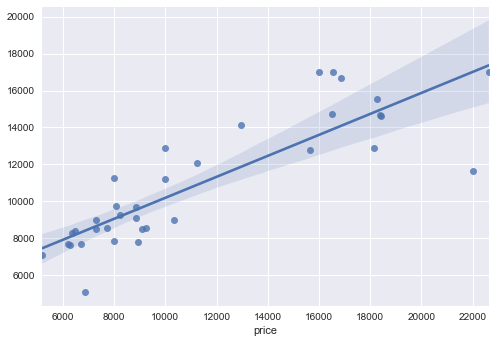

In [144]:
sns.regplot(y_test, y_preds)

<AxesSubplot:xlabel='price', ylabel='Count'>

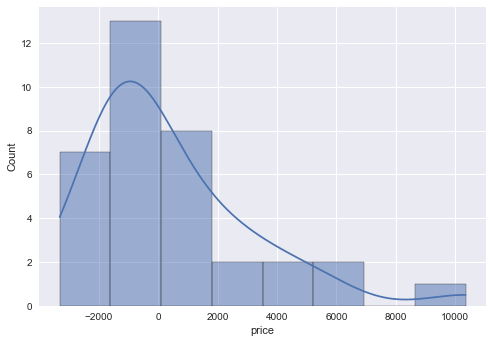

In [145]:
sns.histplot((y_test - y_preds), kde = True)

# FEATURES IMPORTANCES

In [146]:
df3.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [147]:
a = df3.drop(columns = ['car_ID', 'CarName', 'price'])
a.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [148]:
a = pd.get_dummies(a)
a.head(3)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,...,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [149]:
b = df3['price']
b.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x_train, x_test, y_train, y_test = train_test_split(a, b,  random_state = 0)

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
classifier = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [154]:
classifier.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [155]:
RandomForestClassifier(criterion = 'gini', max_depth = 8, min_samples_split = 10, n_jobs = 1, random_state = 0)

RandomForestClassifier(max_depth=8, min_samples_split=10, n_jobs=1,
                       random_state=0)

In [156]:
features = a.columns
importances = classifier.feature_importances_
sorted_indices = np.argsort(importances)[:: -1]
for i in range(x_train.shape[1]):
    print(i +1,  features[sorted_indices[i]], ':', importances[sorted_indices[i]])


1 curbweight : 0.2905918927394827
2 highwaympg : 0.21405739891718623
3 horsepower : 0.1606737305219062
4 wheelbase : 0.07176378218293138
5 fuelsystem_mpfi : 0.06569478536738897
6 citympg : 0.05801929382769743
7 carwidth : 0.023309167779800563
8 enginesize : 0.018172239999013285
9 aspiration_turbo : 0.01602053908304221
10 carlength : 0.01361878620362377
11 symboling : 0.011284864908000203
12 boreratio : 0.007650525049264254
13 carbody_convertible : 0.006836039747299279
14 carbody_hatchback : 0.006304682257799296
15 stroke : 0.00620683244710692
16 compressionratio : 0.005169069763967966
17 peakrpm : 0.005135726396356662
18 carheight : 0.0036056552144975167
19 drivewheel_rwd : 0.0035875117357411237
20 carbody_sedan : 0.0024548124870995675
21 fuelsystem_2bbl : 0.0024312456054882306
22 doornumber_four : 0.0020700301547876714
23 drivewheel_4wd : 0.0015442009469855778
24 carbody_hardtop : 0.001017051700697032
25 drivewheel_fwd : 0.0008624366432605327
26 aspiration_std : 0.0005393188681636204


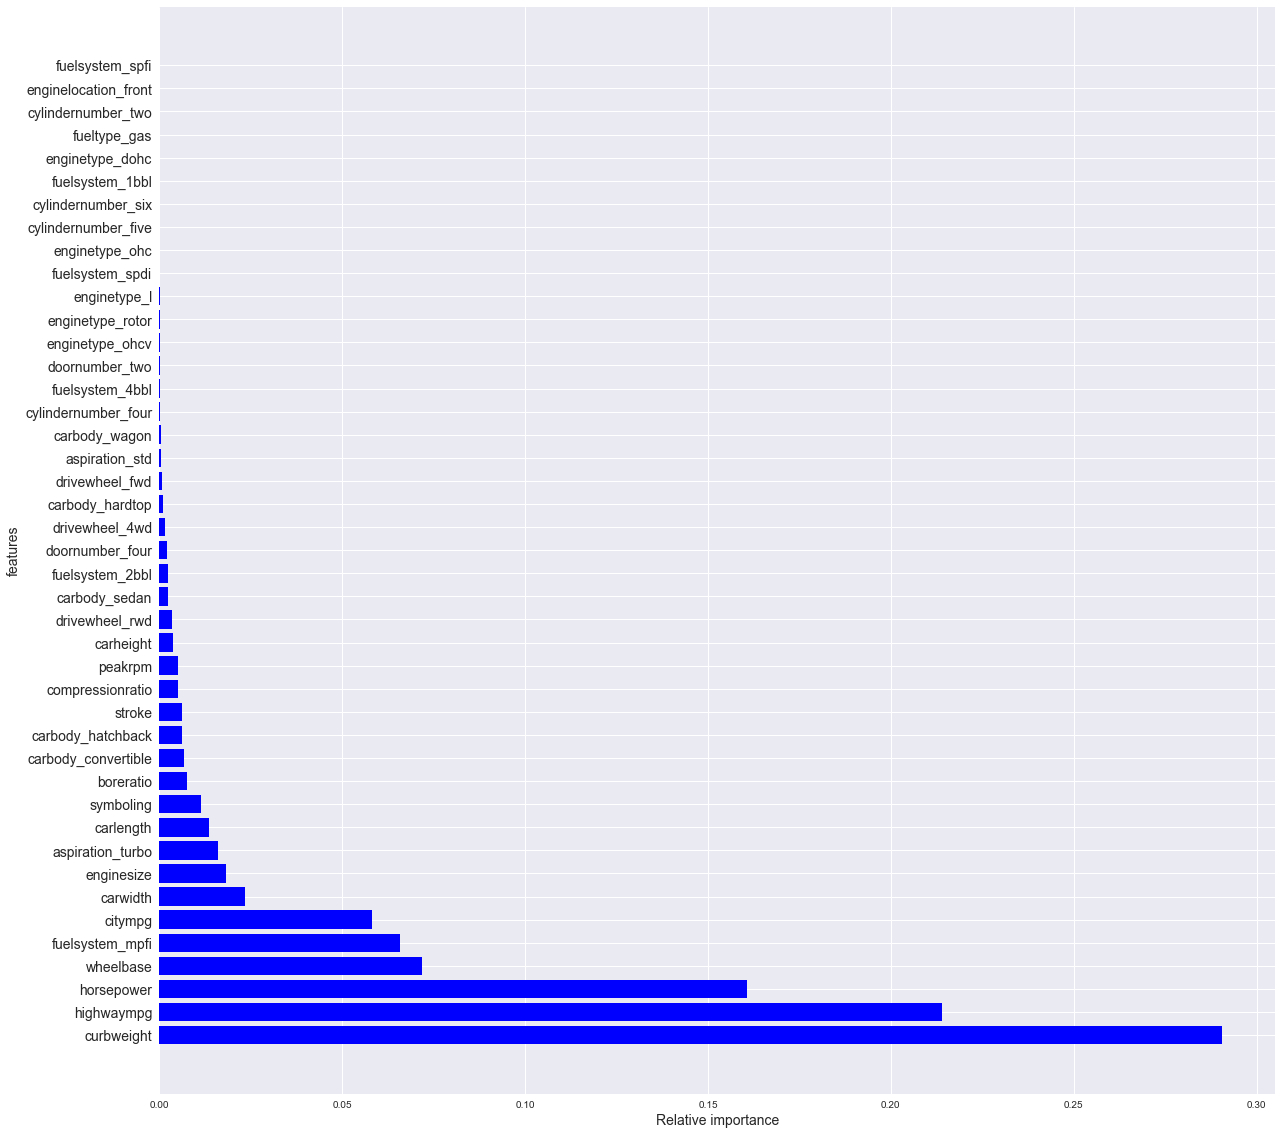

In [157]:
plt.figure(figsize = (20,20))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], color = 'b')
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices], fontsize = 14)
plt.xlabel('Relative importance', fontsize = 14)
plt.ylabel('features', fontsize = 14)
plt.show()

The plot above shows the relative importances of the features.